In [55]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Carregando features.txt em uma series

df = pd.read_csv('./human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/features.txt', sep=' ', header=None)
df.head(5)

,0,1
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [4]:
series_features = pd.Series(df[1])

In [5]:
series_features

0                         tBodyAcc-mean()-X
1                         tBodyAcc-mean()-Y
2                         tBodyAcc-mean()-Z
3                          tBodyAcc-std()-X
4                          tBodyAcc-std()-Y
                       ...                 
556        angle(tBodyGyroMean,gravityMean)
557    angle(tBodyGyroJerkMean,gravityMean)
558                    angle(X,gravityMean)
559                    angle(Y,gravityMean)
560                    angle(Z,gravityMean)
Name: 1, Length: 561, dtype: object

In [6]:
series_features.info()

<class 'pandas.core.series.Series'>
RangeIndex: 561 entries, 0 to 560
Series name: 1
Non-Null Count  Dtype 
--------------  ----- 
561 non-null    object
dtypes: object(1)
memory usage: 4.5+ KB


In [7]:
df2 = pd.read_csv('./human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/subject_train.txt', header=None)

In [8]:
df2 = df2.rename(columns={0: 'info'})

In [9]:
df2.head(5)

,info
0,1
1,1
2,1
3,1
4,1


In [10]:
series_subj_train = pd.Series(df2['info']) 

In [11]:
series_subj_train.head(5)

0    1
1    1
2    1
3    1
4    1
Name: info, dtype: int64

In [12]:
# Carregando X_train

df3 = pd.read_csv('./human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', sep='\s+', engine='python', header = None)

In [13]:
df3.head(5)

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [14]:
df3.shape

(7352, 561)

In [15]:
# Renomeia colunas com o features.

df3.columns = series_features
df3.head(5)

1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [17]:
df3 = df3.assign(info=series_subj_train)
df3.head(5)

1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",info
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1


In [24]:
# Define uma nova coluna com a ordem dos dados

df3['order'] = range (1, len(df3) + 1)
df3.head(5)

,1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",order
order,info,,,,,,,,,,,,,,,,,,,,,
1,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1
2,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,2
3,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,3
4,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,4
5,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5


In [25]:
# Criação de um índice duplo a partir da coluna 'order' e 'info'

df3 = df3.set_index(['order', 'info'])
df3.head(5)

KeyError: "None of ['info'] are in the columns"

In [27]:
# Carregando subject_test.txt em uma series.

df_test = pd.read_csv('./human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/subject_test.txt', header=None)
df_test.head(5)

,0
0,2
1,2
2,2
3,2
4,2


In [28]:
df_test = df_test.rename(columns={0: 'info'})

In [29]:
series_subj_test = pd.Series(df_test['info'])
series_subj_test.head(5)

0    2
1    2
2    2
3    2
4    2
Name: info, dtype: int64

In [30]:
series_subj_test.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2947 entries, 0 to 2946
Series name: info
Non-Null Count  Dtype
--------------  -----
2947 non-null   int64
dtypes: int64(1)
memory usage: 23.2 KB


In [31]:
# Carregando X_test
df_X_test = pd.read_csv('./human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt', sep='\s+', engine='python', header = None)
df_X_test.head(5)

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [32]:
df_X_test.shape

(2947, 561)

In [33]:
df_X_test.columns = series_features
df_X_test.head(5)

1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [34]:
df_X_test = df_X_test.assign(info=series_subj_test)
df_X_test.head(5)

1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",info
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2


In [35]:
# Define uma nova coluna com a ordem dos dados
df_X_test['order'] = range (1, len(df_X_test) + 1)

In [36]:
# Criação de um índice duplo a partir da coluna 'order' e 'info'
df_X_test = df_X_test.set_index(['order', 'info'])
df_X_test.head(5)

,1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
order,info,,,,,,,,,,,,,,,,,,,,,
1,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
2,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
3,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
4,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
5,2,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [37]:
# Salvando o dataframe com os dados de treino em csv.

df3.to_csv('X_train.csv')

In [38]:
# Salvando o dataframe com os dados de teste em csv.

df_X_test.to_csv('X_test.csv')

In [39]:
# Carregando o csv gerado para a base de treino

X_train = pd.read_csv('X_train.csv')
X_train.head(5)

,order,info,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",order.1
0,1,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1
1,2,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,2
2,3,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,3
3,4,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,4
4,5,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5


In [40]:
# Carregando o csv gerado para a base de teste

X_test = pd.read_csv('X_test.csv')
X_test.head(5)

,order,info,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,1,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,3,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,4,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,5,2,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [43]:
y_train = pd.read_csv('y_train.txt', header = None)
y_test = pd.read_csv('y_test.txt', header = None)

In [59]:
print("Número de amostras em X_train:", len(X_train))
print("Número de amostras em y_train:", len(y_train))

Número de amostras em X_train: 7352
Número de amostras em y_train: 7352


In [60]:
print("Número de amostras em X_test:", len(X_test))
print("Número de amostras em y_test:", len(y_test))

Número de amostras em X_test: 2947
Número de amostras em y_test: 2947


In [61]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.2, random_state=2360873)

In [62]:
print("Número de amostras em X_train:", len(X_train))
print("Número de amostras em y_train:", len(y_train))

Número de amostras em X_train: 5881
Número de amostras em y_train: 5881


In [63]:
print("Número de amostras em X_test:", len(X_test))
print("Número de amostras em y_test:", len(y_test))

Número de amostras em X_test: 2947
Número de amostras em y_test: 2947


In [64]:
# Treinando o modelo com uma árvore de decisão de profundidade máxima =4.

clf = DecisionTreeClassifier(random_state = 2360873, max_depth=4).fit(X_train, y_train)

In [65]:
# Obter a importância das variáveis
importancias = clf.feature_importances_

# Imprimir a importância de cada variável
for i, importancia in enumerate(importancias):
    print("Importância da variável", i, ":", importancia)

Importância da variável 0 : 0.0
Importância da variável 1 : 0.0
Importância da variável 2 : 0.0
Importância da variável 3 : 0.0
Importância da variável 4 : 0.0
Importância da variável 5 : 0.0
Importância da variável 6 : 0.0
Importância da variável 7 : 0.0
Importância da variável 8 : 0.0
Importância da variável 9 : 0.0
Importância da variável 10 : 0.0
Importância da variável 11 : 0.0
Importância da variável 12 : 0.0
Importância da variável 13 : 0.0
Importância da variável 14 : 0.0
Importância da variável 15 : 0.0
Importância da variável 16 : 0.0
Importância da variável 17 : 0.0
Importância da variável 18 : 0.0
Importância da variável 19 : 0.0
Importância da variável 20 : 0.0
Importância da variável 21 : 0.0
Importância da variável 22 : 0.0
Importância da variável 23 : 0.0
Importância da variável 24 : 0.0
Importância da variável 25 : 0.0
Importância da variável 26 : 0.0
Importância da variável 27 : 0.0
Importância da variável 28 : 0.0
Importância da variável 29 : 0.0
Importância da variá

In [66]:
# Obter os índices das variáveis em ordem decrescente de importância
indices = np.argsort(importancias)[::-1]

# Selecionar as três variáveis de maior importância
top3_indices = indices[:3]

# Imprimir as três variáveis de maior importância
for i in top3_indices:
    print("Variável", X_train.columns[i], "com importância", importancias[i])

Variável tGravityAcc-min()-X com importância 0.2833899579689638
Variável fBodyAcc-mad()-X com importância 0.25311371583590603
Variável angle(Y,gravityMean) com importância 0.1671373584881217


In [67]:
# Criar um novo DataFrame com as colunas selecionadas
X_train_filtrado = X_train.loc[:, ["tGravityAcc-min()-X", "fBodyAcc-mad()-X", "angle(Y,gravityMean)"]]
X_test_filtrado = X_test.loc[:, ["tGravityAcc-min()-X", "fBodyAcc-mad()-X", "angle(Y,gravityMean)"]]

# Imprimir o novos DataFrame
X_train_filtrado.head(5)

,tGravityAcc-min()-X,fBodyAcc-mad()-X,"angle(Y,gravityMean)"
1322,0.979581,-0.978521,0.151536
630,0.955186,-0.267975,0.255428
7227,0.946756,-0.994662,0.081037
3052,0.979413,-0.996863,0.043250
2629,-0.103450,-0.991770,-0.774497


In [68]:
clf = DecisionTreeClassifier(random_state = 2360873, min_samples_leaf=20).fit(X_train_filtrado, y_train)

In [69]:
clf = DecisionTreeClassifier(random_state=2360873)
caminho = clf.cost_complexity_pruning_path(X_train_filtrado, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

In [70]:
# Garantindo que os ccp_alphas são únicos e positivos
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

In [71]:
ccp_alphas

array([0.00000000e+00, 1.13359406e-04, 1.27529332e-04, 1.36031287e-04,
       1.41699257e-04, 1.44533243e-04, 1.45747808e-04, 1.47367228e-04,
       1.48784220e-04, 1.48784220e-04, 1.51145875e-04, 1.53035198e-04,
       1.54581008e-04, 1.55869183e-04, 1.56959178e-04, 1.57893458e-04,
       1.59315922e-04, 1.59411665e-04, 1.61089682e-04, 1.61537154e-04,
       1.62646104e-04, 1.62794335e-04, 1.62954146e-04, 1.63499143e-04,
       1.63966284e-04, 1.64072824e-04, 1.65037959e-04, 1.65315800e-04,
       1.66260462e-04, 1.66705009e-04, 1.67055967e-04, 1.67251583e-04,
       1.67512688e-04, 1.68267868e-04, 1.68850024e-04, 1.68956057e-04,
       1.69454782e-04, 1.69723051e-04, 1.70039109e-04, 1.70039109e-04,
       1.76909376e-04, 1.77722928e-04, 1.81375050e-04, 1.84113507e-04,
       1.84968728e-04, 1.88932343e-04, 1.91836266e-04, 1.96422161e-04,
       1.98045550e-04, 1.99512555e-04, 2.01843707e-04, 2.02427511e-04,
       2.02853674e-04, 2.04046931e-04, 2.09278903e-04, 2.14183878e-04,
      

In [72]:
ccp_alphas_filtrado = ccp_alphas

In [73]:
grid_parametros = {'ccp_alpha':ccp_alphas_filtrado}

In [74]:
grid = GridSearchCV(estimator = clf, param_grid=grid_parametros, cv=10, verbose=100)
grid.fit(X_train_filtrado, y_train)

Fitting 10 folds for each of 230 candidates, totalling 2300 fits
[CV 1/10; 1/230] START ccp_alpha=0.0............................................
[CV 1/10; 1/230] END .............ccp_alpha=0.0;, score=0.896 total time=   0.0s
[CV 2/10; 1/230] START ccp_alpha=0.0............................................
[CV 2/10; 1/230] END .............ccp_alpha=0.0;, score=0.896 total time=   0.0s
[CV 3/10; 1/230] START ccp_alpha=0.0............................................
[CV 3/10; 1/230] END .............ccp_alpha=0.0;, score=0.895 total time=   0.0s
[CV 4/10; 1/230] START ccp_alpha=0.0............................................
[CV 4/10; 1/230] END .............ccp_alpha=0.0;, score=0.888 total time=   0.0s
[CV 5/10; 1/230] START ccp_alpha=0.0............................................
[CV 5/10; 1/230] END .............ccp_alpha=0.0;, score=0.878 total time=   0.0s
[CV 6/10; 1/230] START ccp_alpha=0.0............................................
[CV 6/10; 1/230] END .............ccp_alpha=

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=2360873),
             param_grid={'ccp_alpha': array([0.00000000e+00, 1.13359406e-04, 1.27529332e-04, 1.36031287e-04,
       1.41699257e-04, 1.44533243e-04, 1.45747808e-04, 1.47367228e-04,
       1.48784220e-04, 1.48784220e-04, 1.51145875e-04, 1.53035198e-04,
       1.54581008e-04, 1.55869183e-04, 1.56959178e-04, 1.57893458e-04,
       1.593...
       1.72479389e-03, 1.75320324e-03, 1.83219842e-03, 1.85270994e-03,
       1.89243526e-03, 1.90743386e-03, 1.98967607e-03, 2.47684684e-03,
       2.52943604e-03, 2.57552277e-03, 2.63698077e-03, 2.75684728e-03,
       2.79326209e-03, 2.91853829e-03, 3.74233598e-03, 4.46051541e-03,
       4.86601334e-03, 5.45085933e-03, 6.44002605e-03, 6.59903624e-03,
       9.20256166e-03, 4.10192686e-02, 7.51099945e-02, 1.10257397e-01,
       1.66974396e-01, 1.86947068e-01])},
             verbose=100)

In [75]:
resultados = pd.DataFrame(grid.cv_results_)
resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014172,0.005563,0.001601,0.003650,0.0,{'ccp_alpha': 0.0},0.896435,0.896259,0.894558,0.887755,0.877551,0.894558,0.879252,0.891156,0.880952,0.882653,0.888113,0.007066,139
1,0.012199,0.005774,0.002023,0.004750,0.000113,{'ccp_alpha': 0.00011335940599671258},0.896435,0.896259,0.894558,0.887755,0.877551,0.894558,0.879252,0.891156,0.880952,0.882653,0.888113,0.007066,139
2,0.014118,0.004816,0.000000,0.000000,0.000128,{'ccp_alpha': 0.00012752933174630166},0.896435,0.894558,0.894558,0.887755,0.875850,0.894558,0.879252,0.891156,0.880952,0.882653,0.887773,0.007156,146
3,0.011044,0.006521,0.001563,0.004689,0.000136,{'ccp_alpha': 0.00013603128719605505},0.896435,0.894558,0.894558,0.887755,0.875850,0.894558,0.879252,0.891156,0.880952,0.882653,0.887773,0.007156,146
4,0.009436,0.007706,0.001558,0.004675,0.000142,{'ccp_alpha': 0.00014169925749589073},0.896435,0.894558,0.894558,0.887755,0.875850,0.894558,0.879252,0.887755,0.880952,0.882653,0.887433,0.007067,153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,0.013844,0.004676,0.001575,0.004726,0.041019,{'ccp_alpha': 0.04101926858462657},0.830221,0.778912,0.845238,0.821429,0.833333,0.772109,0.797619,0.790816,0.790816,0.782313,0.804281,0.024610,226
226,0.015672,0.000080,0.001563,0.004690,0.07511,{'ccp_alpha': 0.07510999453708161},0.775891,0.676871,0.681973,0.765306,0.770408,0.673469,0.751701,0.688776,0.687075,0.782313,0.725378,0.044549,227
227,0.015504,0.000461,0.003304,0.006616,0.110257,{'ccp_alpha': 0.11025739701616827},0.541596,0.676871,0.544218,0.678571,0.675170,0.673469,0.664966,0.540816,0.540816,0.540816,0.607731,0.066170,228
228,0.015654,0.000058,0.001365,0.004094,0.166974,{'ccp_alpha': 0.1669743958478348},0.376910,0.544218,0.544218,0.377551,0.377551,0.377551,0.542517,0.375850,0.375850,0.375850,0.426807,0.076497,229


In [76]:
# Identificando o melhor ccp_alpha
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0002975684407413705, random_state=2360873)

In [77]:
melhor_arvore = grid.best_estimator_

In [78]:
# Acurácia da melhor árvore. Apresenta cerca de 90% de precisão na base de treinamento.
grid.best_score_

0.8962761165586777

In [79]:
grid.best_index_

97

In [80]:
melhor_ccp = resultados.iloc[grid.best_index_,4]

clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=melhor_ccp).fit(X_train_filtrado, y_train)

In [83]:
acuracia_teste = clf.score(X_test_filtrado, y_test)

Acurácia: 72.31


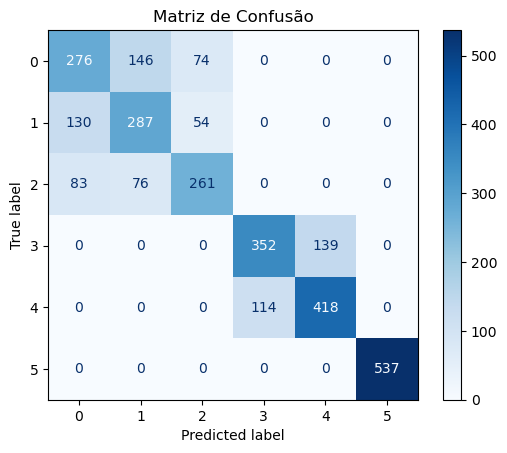

In [84]:
# Fazer previsões com o modelo
y_pred = melhor_arvore.predict(X_test_filtrado)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
print(f'Acurácia: {acuracia_teste*100:.2f}')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()